# STA 208: Homework 1 (Do not distribute)

## Due 04/24/2022 midnight (11:59pm)

__Instructions:__ 

1. Submit your homework using one file name ”LastName_FirstName hw1.html” on canvas. 
2. The written portions can be either done in markdown and TeX in new cells or written by hand and scanned. Using TeX is strongly preferred. However, if you have scanned solutions for handwriting, you can submit a zip file. Please make sure your handwriting is clear and readable and your scanned files are displayed properly in your jupyter notebook. 
3. Your code should be readable; writing a piece of code should be compared to writing a page of a book. Adopt the one-statement-per-line rule. Consider splitting a lengthy statement into multiple lines to improve readability. (You will lose one point for each line that does not follow the one-statementper-line rule)
4. To help understand and maintain code, you should always add comments to explain your code. (homework with no comments will receive 0 points). For a very long comment, please break it into multiple lines.
5. In your Jupyter Notebook, put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text.
6. Please make sure to print out the necessary results to avoid losing points. We should not run your code to figure out your answers. 
7. However, also make sure we are able to open this notebook and run everything here by running the cells in sequence; in case that the TA wants to check the details.
8. You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions


### Exercise 1 (Empirical risk minimization) (20 pts, 5 pts each)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 

__Solution:__

Based on the above expression, we can find the log density of the poisson distribution after substituting $\lambda = e^{\beta^Tx}$ back into the probability function. On doing so, we get the density function as: 

$$
p(y|x,\beta) = \frac{(e^{\beta^Tx})^y}{y!} e^{-e^{\beta^Tx}}
$$

On taking the log of this, we get:

$$
\log p(y|x,\beta) = y\beta^Tx - \log(y!) - {e^{\beta^Tx}}
$$

Based on the definition of the $\alpha$ proportionality, we just ignore the additive terms not dependent on $\beta$ to get the loss function which is given as:

$$
l_i(\beta) = -\log p(y_i | x_i, \beta) = - (y_i\beta^Tx_i - e^{\beta^Tx_i}) = e^{\beta^Tx_i} - y_i\beta^Tx_i
$$

The gradient of this loss function is given as:
$$
\frac{\partial l_i(\beta)}{\partial \beta} = x_i (e^{\beta^Tx_i} - y_i)
$$

2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.

__Solution:__

The risk function $R_n(\beta)$ is defined as summation of loss functions for each data point. It is formally defined as:

$$
R_n(\beta) = \frac{1}{n} \sum_{i=1}^n l_i(\beta)
$$

In order to show that the risk function is convex, we can use the fact that if loss function is convex, then the risk function is convex as risk function is a linear combination or sum of the loss functions at every 'i'.

Now in order to show the loss function is convex, we have to show that the double derivative of the loss function is $\geq 0$.

From part 1, we have the gradient as:

$$
\frac{\partial l_i(\beta)}{\partial \beta} = x_i (e^{\beta^Tx_i} - y_i)
$$

Taking the double derivate of the above expression as:

$$
\frac{\partial^2 l_i(\beta)}{\partial \beta^2} = x_i^Tx_i(e^{\beta^Tx_i}) \geq 0
$$

Since for any values of $x_i$, the double derivative would be greater than 0, we can conclude that the loss function is convex. 

Since the loss function is convex and the risk function is the sum of loss functions, we can conclude that the risk function is convex as well.

3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.

__Solution:__

In order to show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$, we have to show that the gradient of the risk function is zero at the minimizer of $R_n$.

$$
\frac{\partial R_n(\beta)}{\partial \beta} = \frac{\partial}{\partial \beta}(\frac{1}{n} \sum_{i=1}^n l_i(\beta)) = \frac{1}{n} \sum_{i=1}^n \frac{\partial}{\partial \beta} l_i(\beta)
$$

$$
 = \frac{1}{n} \sum_{i=1}^n x_i (e^{\beta^Tx_i} - y_i) 
$$

To minimize this, we need to set the above equation to 0 in order to get the estimate $\hat{\beta}$ ie. 

$$
\frac{1}{n} \sum_{i=1}^n x_i (e^{\beta^Tx_i} - y_i) = 0
$$

$$
 e^{\hat{\beta}^Tx_i} - y_i = 0
$$

Taking the log on both the sides we get

$$
\hat{\beta}^Tx_i - \log y_i = 0 
$$

Therefore, we have 
$$
\hat{\beta}^T = \log y_i x_i^{-1}
$$

We know as a fact that since the $R_n(\beta)$ is convex, the gradient of the risk function is zero at the minimizer of $R_n$. Therefore, we can conclude that the estimate $\hat{\beta}$ is the minimizer of $R_n$.

At the minimizer of $R_n$, we have that $F(\hat \beta) = \hat \beta$, as $\nabla = 0 |_{\beta = \hat{\beta}}$ as we can see from the above calculations.

4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data ($n$ large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

__Solution__:

In [1]:
# Importing the required libraries for question 1
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Simulate from the Poisson regression model (use y,X)
np.random.seed(2022)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

In [3]:
# Defining gradient descent function
def gradient_descent(X,y,eta,maxiter = 10000):
    """
    Summary: 
    The gradient descent function takes in the X,y,eta and
    maxiter as inputs and returns the optimal beta.
    It initially starts from a random beta and tries to approximate
    F(beta) = beta hat

    Args:
        X (np.array): n x p matrix of covariates
        y (np.array): n x 1 vector of response
        eta (np.float64): Learning rate
        maxiter (int, optional): Iterations for which the approximation is done. 
        Defaults to 1000.
    """
    
    # Defining the initial beta 
    random_beta = np.random.normal(0,0.2,size = (p))
    # Empty array to store the beta values
    betas = np.zeros((maxiter,20))
    
    for i in range(maxiter):
        # Getting the predictions
        predictions = np.exp(X @ random_beta)
    
        # Computing the gradient descent beta for the ith iteration
        random_beta = random_beta - eta * 1/(X.shape[0]) * X.T @ (predictions - y)
        # Storing the beta values 
        betas[i,:] = random_beta        
    
    # returning the all obtained betas
    return betas

In [4]:
# Checking for various learning rates that might be suitable for the 
# problem
eta = [10 ** -x for x in range(1,6)]

# Getting the mse for all etas
overall_mse = []
for e in eta:
    # Getting the estimates
    estimated_beta = gradient_descent(X,y,e)
    # Storing the mses at ebery iteration
    mse = []
    for estimate in estimated_beta:
        mse.append(((estimate - beta) ** 2).mean())
    
    # Appending the mse for the particular eta"
    overall_mse.append(mse)

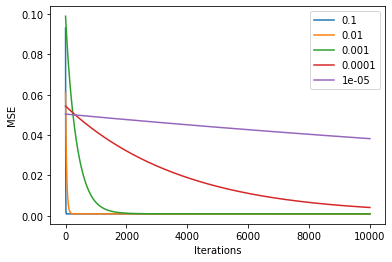

In [5]:
# Getting a plot for every eta value and seeing how quickly does 
# the beta converge
for mse in overall_mse:
    # Plotting the mse vs iteration
    plt.plot(range(10000), mse)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(eta)

From the above, we can conclude that the gradient descent algorithm converges to the true $\beta$ as the learning rate $\eta$ is small enough. In this case, the best seems to be $\eta = 0.001$ where it converges very smoothly between 0 and 2000 iterations.

### Exercise 2 (Regression and OLS) (35 pts, 5 pts each)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that linear regression can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$. 

__Solution:__

Given, $\hat y = H y$, in general for any $p < n$, we can write the linear regression as: 

The predictions $\hat y$ are given by $X \hat \beta$ where $X$ is the matrix of where each row is $x_i$ and $\hat \beta$ is the vector of estimated coefficients.

$$
\hat y = X \hat \beta
$$

By the OLS solution we know that $\hat \beta = (X^T X)^{-1} X^T y $. Substituting the above expression for $\hat \beta$ we get:

$$
\hat y = X \hat \beta = X (X^T X)^{-1} X^T y
$$

To find the $\hat \beta$, we can use the OLS solution. where we try to minimize the following:

$$
argmin_{} \|y - X\beta\|_2^2
$$

$$
 = argmin (y - X\beta)^T (y - X\beta)
$$

$$
 = argmin (y^Ty - 2\beta^TX^Ty + \beta^T X^T X \beta)
$$

On taking the derivative of the above expression, we get:
$$
\hat \beta = (X^T X)^{-1} X^T y
$$
Correlating with the given expression $\hat y = Hy$, we get:

$$
H = X (X^T X)^{-1}X^T
$$

2. Assuming $p < n$ and $X$ is full rank, let $X = U D V^\top$ be the thin singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). 
    - a) Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.

    __Solution:__
    We know that the OLS coefficients are given by:
    $$
    X \beta = y
    $$

    $$
    UDV^T \beta = y
    $$

    Multiplying by U^T on both the sides and by property of SVD we know that $UU^T = I$, we get

    $$
    U^T (UDV^T) \beta = (UU^T)DV^T \beta = DV^T \beta = U^T y
    $$
   
   Since D is a singular matrix, we can take the inverse of D and multiply it by $V$ to get the OLS coefficients.

   $$
   V^T \beta = D^{-1} U^T y
   $$

   $$
   VV^T \beta = VD^{-1} U^T y
   $$

   $$
   \beta = VD^{-1} U^T y
   $$

   On comparing the obtained expression with the given expression $\beta = Ab$, we can say that,

   $$
   A_{p \times p} = VD^{-1} \text{ \& } b = U^T y
   $$

    - b) Describe a fit method that precomputes these quantities separately

    __Solution:__

    Scipy's svd function can be used to compute the SVD of a matrix. In order to compute the above A and B we can write the following

   

In [6]:
# Defining the librarry for question 2
from scipy.linalg import svd

In [7]:
# Defining a function to calculate the A and B values
def custom_svd(X,y):
    # Getting the U,D,V values from the X matrix
    U,D,V_t = svd(X,full_matrices = False)
    
    # Getting inverse of D
    D_inv = np.diag(1/D)
    
    # Getting the A and B values
    A = V_t.T @ D_inv  
    
    b = U.T @ y
    
    return A,b

 - c) Use the simulated data $y$ and $X$ in below to find $\hat \beta$ using SVD.

In [8]:
## Simulate from the linear regression model (use y,X)
np.random.seed(2022)
n, p = 100,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
sigma = 1
y = np.random.normal(X @ beta, sigma**2)

In [9]:
# Calculating the estimated beta using the above function 
A,b = custom_svd(X,y)

# beta is given by A @ b
beta_hat = A @ b

# The estimated beta is 
beta_hat

array([-0.17529727,  0.2409376 , -0.44251575, -0.03407534,  0.23607846,
       -0.2524819 ,  0.50945566,  0.03948573,  0.21520295, -0.03151863,
        0.02374895,  0.13474846, -0.37652418, -0.01026382, -0.33508302,
       -0.04318508,  0.2321108 , -0.20681122, -0.05872932, -0.24552763])

- d) Call a new data $\tilde X \in \mathbb{R}^{m \times p}$, derive an expression for the predicted $y$ with $\tilde X$ using SVD. 

__Solution:__

We know that the predicted $y$ is given by:
$$
\hat y =  X \hat \beta \text{ where } \hat \beta = (X^T X)^{-1} X^T y
$$

On substituting the SVD decomposition of $\hat \beta$ we get:
$$
\hat y = \tilde X \tilde V \tilde D^{-1}\tilde U^T y
$$

$$
= \tilde U \tilde D \tilde V^T \tilde V \tilde D^{-1}\tilde U^T y
$$

On simplifying the above expression we get, 

$$
\hat y = \tilde U \tilde U^T y
$$


3. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal, the remainder will be set to 0.  Call this new $p \times p$ matrix $D_r$ ($r < p$).  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U D_r V^\top$.  
- a) Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?

    __Solution:__
    Using the same implementation as before, we can modify the singular value decomposition to only use the largest $r$ values on the diagonal. The function <code>change_rank</code> will be used to recompute the OLS coefficients with a lower rank using the same computation as <code> estimate_using_svd</code> function written in the previous part.

In [10]:
# Defining the change rank function 
def change_rank(X,y,r = np.linalg.matrix_rank(X)):
    # Getting SVD decompostion
    U,D,V_t = svd(X,full_matrices = False)
    
    # svd() returms the singular values as an array so we convert it to a diagonal matrix
    D_inv = 1/D
    if r != np.linalg.matrix_rank(X):
        # getting r values and setting rest to 0 
        D_inv = np.append(D_inv[:r], np.zeros(len(D) - r))
        D_inv = np.diag(D_inv)
    
   # Getting the A and B values
    A = V_t.T @ D_inv  
    
    b = U.T @ y
    
    # retunrning A and b
    return A,b
    


- b) Choose $r = 10$, recompute $\hat\beta$ (call it $\hat\beta_{\text{LowRank}}$) in Question 2-c.

__Solution:__

In [11]:
# Getting A and b based on r = 10 
A,b = change_rank(X,y,r = 10)

# Estimated beta is given by A @ b
estimated_beta = A @ b

estimated_beta

array([ 0.03112502, -0.0430854 , -0.16394756,  0.03728632,  0.03755968,
       -0.04653204, -0.04193316,  0.13440484, -0.02375678, -0.02505815,
        0.26185551,  0.02535527, -0.04744292, -0.01710232, -0.03823046,
       -0.01175641,  0.06146285, -0.16952398, -0.01660738, -0.10822824])

### Exercise 3 (Subset selection)  (15 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : \| \beta \|_0 \le k}\| y - X \beta \|_2^2,
$$
where $\|\beta\|_0 = \#\{j = 1\,\ldots,p : \beta_j \ne 0 \}$.

Notice that we can write this as 
$$
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2,
$$
where 
${\rm supp}(\beta) = \{j = 1\,\ldots,p : \beta_j \ne 0 \}$ (${\rm supp}(\beta)$ is the support of $\beta$).


1. (5 points) Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.

__Solution:__

We know that the predictions are given by:
$$
\hat y = X \hat \beta = H y \text{ where } H = X (X^T X)^{-1}X^T
$$

In order to minimize the above problem, we need to find a $\beta$ that would minimize the difference between $y$ and $x\beta$, which happens to be $\hat \beta$. If we resubtitute $\beta = \hat \beta$, then we get the expression mentioned above hence the problem further converts into:

$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\| y - \hat y \|_2^2 = \min_{|S \subseteq \{1,\ldots,p\}, |S|\le k}\| y - H_sy\|_2^2 
$$

$$
=  \min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\| y(I - H_s ) \|_2^2 
$$

Note that in the above expression, instead of the normal $H$ which would consider all the predictors, $H_s$ would be selecting all the predictors that are in the support of $\beta$ which are in the set $S$.

On expanding the expression, we get:

$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\ y^T(I-H_s)^T(I-H_s)y
$$

Since $H_s$ is a projection, we can also say that $(I-H_s)$ is symmetric, hence we can write the above expression as:

$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\ y^T(I-H_s)y
$$

We can substitute the expression for $I-H_s$ as $P_s$ and we get:

$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\ y^TP_sy
$$


2. (10 points) Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ ($|S_k|$ is the cardinality of $S_k$, meaning that it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?

(Hint: using the fact that $X^TX$ is positive definite, write $X^TX= VDV^T$)

__Solution:__

Using the given inequality, we have:
$$
y^TP_ky \ge y^TP_{k+1}y => y^T (I-H_k)y \ge y^T (I-H_{k+1})y
$$

$$
y^Ty -y^TH_ky \ge y^Ty -H_{k+1}y 
$$

$$
y^TH_ky \le y^T H_{k+1}y
$$

Substituting the expression for $H_k$ in its SVD form we get the following:

$$
y^T UDV^T V D_k^{-1}U^T y \le y^T UDV^T V D_{k+1}^{-1}U^T y
$$

$$
y^TU D D_k^{-1}U^T y \le y^TU D D_{k+1}^{-1}U^T y
$$

Noticing that $DD_k^{-1}$ is 'k' 1's on the diagonal and rest 0's, we notice that the expression is in the form of $x^T A x$ which can be simplified into: 

$$
\sum_{i = 1}^{k} (\sum_{j = 1}^{n} U_{ji}y_j)^{2} \le \sum_{i = 1}^{k+1} (\sum_{j = 1}^{n} U_{ji}y_j)^{2}
$$

We can see the RHS is the summation of 1 extra term than on the LHS. Hence the inequality is satisfied.

### Exercise 4 (Ridge, lasso and adaptive lasso) (40 pts, 5 pts each)

For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the training dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the $X$ (divide by the column norms).

__Solution:__

In [12]:
# Importing all the required packages for question 4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lars_path
from sklearn.preprocessing import normalize

In [13]:
# Loading our data
import pickle
with open('hw1.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [14]:
# Normalizing the data by dividing the column by its norm 
X_tr_scaled = normalize(X_tr,axis = 0)

In [15]:
# Using the Linear Regression model from sci-kit learn
ols = LinearRegression(fit_intercept = False)
# Fitting the model
ols.fit(X_tr_scaled,y_tr)

LinearRegression(fit_intercept=False)

In [16]:
# Getting the testing accuracy
predictions = ols.predict(X_te)

# Getting the MSE
ols_sse = mean_squared_error(y_te,predictions)
print("The MSE for the OLS model is: {:.4f}".format(ols_sse))

The MSE for the OLS model is: 5209.3163


2. Ridge regression:
- a) Train and tune ridge regression using a validation set (choose LOOCV) and compute the test error (square error loss).

__Solution:__

In [17]:
# Importing the required packages
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

In [18]:
# RidgeCV by default uses the LOO cross validation
# By giving it no alphas, it assumes default to be [0.1,1,10]
loocv_ridge = RidgeCV(store_cv_values = True, fit_intercept=False)
# Fitting the model 
loocv_ridge.fit(X_tr_scaled,y_tr)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), fit_intercept=False,
        store_cv_values=True)

In [19]:
# Getting the predictions
loocv_ridge_predictions = loocv_ridge.predict(X_te)

# Getting the SSE for the RidgeCV model
loocv_ridge_sse = mean_squared_error(y_te,loocv_ridge_predictions)

print("The MSE for the RidgeCV model is: {:.4f}".format(loocv_ridge_sse))

The MSE for the RidgeCV model is: 3651.7683


- b) Repeat a) but using K-fold (you can choose $K= 5$ or 10) cross validation, compute the test error. Compare the result to a). Comment on what you found.

__Solution:__

In [20]:
# RidgeCV by default uses the LOO cross validation but by 
# setting cv = 10, we get a 10-fold cross validation
# By giving it no alphas, it assumes default to be [0.1,1,10]
kfold_ridge = RidgeCV(cv = 10,store_cv_values = False, 
                      fit_intercept = False)

# Fitting the model
kfold_ridge.fit(X_tr_scaled,y_tr)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=False)

In [21]:
# Getting the predictions
kfold_predictions = kfold_ridge.predict(X_te)

# Getting the SSE for the RidgeCV model
kfold_ridge_sse = mean_squared_error(y_te,kfold_predictions)

print("The MSE for the RidgeCV model is: {:.4f}".format(kfold_ridge_sse))

The MSE for the RidgeCV model is: 3651.7683


On noticing the MSE values we get, we see basically no improvement in the K-fold cross validation and the LOOCV. Unlike LOOCV, the k-fold CV does not explore all of the possible splits of the original data: it randomly splits the data set into k equally sized partitions, keeping one as validation set and k − 1 as training set. However LOOCV is more suitable when the dataset is smaller

3. Fit the lasso path with lars to the data and compute the test error for each returned lasso coefficient.

__Solution:__

In [22]:
# Default function for getting the plots
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [23]:
# Getting the lasso path for training data using the 'lars_path' 
# function by setting the method as 'lasso'
# The lars function returns the alphas , the coefficients and the 
# active set
alphas,active_lasso,coefs = lars_path(X_tr_scaled,y_tr,method = 'lasso')

In [24]:
# Calculating the test error for the lasso path
for i in range(coefs.shape[1]):
    mse = mean_squared_error(y_te,X_te @ coefs[:,i])
    print("The MSE for the {}th feature is: {:.4f}".format(i,
                mse))

The MSE for the 0th feature is: 6.0565
The MSE for the 1th feature is: 828.3130
The MSE for the 2th feature is: 2103.2714
The MSE for the 3th feature is: 2733.1611
The MSE for the 4th feature is: 3641.9393
The MSE for the 5th feature is: 3675.6728
The MSE for the 6th feature is: 3835.6989
The MSE for the 7th feature is: 3870.5148
The MSE for the 8th feature is: 3961.7864
The MSE for the 9th feature is: 3970.7311
The MSE for the 10th feature is: 3972.2181
The MSE for the 11th feature is: 3973.3568
The MSE for the 12th feature is: 3975.9204
The MSE for the 13th feature is: 3976.9031
The MSE for the 14th feature is: 3991.6420
The MSE for the 15th feature is: 4006.7771
The MSE for the 16th feature is: 4016.6011
The MSE for the 17th feature is: 4028.9334
The MSE for the 18th feature is: 4072.1554
The MSE for the 19th feature is: 4091.7907
The MSE for the 20th feature is: 4107.4824
The MSE for the 21th feature is: 4110.1380
The MSE for the 22th feature is: 4112.6543
The MSE for the 23th feat

One of the interesting thing to note is that the MSE eventually converges to the MSE obtained in the normal OLS case

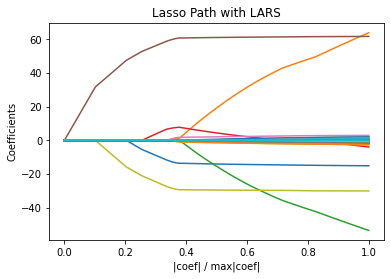

In [25]:
# plotting for Lasso path obtained using LARS
plot_lars(coefs=coefs,lines=False, title = "Lasso Path with LARS")

4. Perform 3 without the lasso modification generating the lars path.  Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.

__Solution:__

In [26]:
# Getting the lars path for training data
alphas,active_lars,coefs = lars_path(X_tr_scaled,y_tr, method = 'lars')

# Calculating the MSE 
for i in range(coefs.shape[1]):
    print("The MSE for the {}th feature is: {:.4f}".format(i,
                mean_squared_error(y_te,X_te @ coefs[:,i])))

The MSE for the 0th feature is: 6.0565
The MSE for the 1th feature is: 828.3130
The MSE for the 2th feature is: 2103.2714
The MSE for the 3th feature is: 2733.1611
The MSE for the 4th feature is: 3641.9393
The MSE for the 5th feature is: 3675.6728
The MSE for the 6th feature is: 3835.6989
The MSE for the 7th feature is: 3870.5148
The MSE for the 8th feature is: 3961.7864
The MSE for the 9th feature is: 3970.7311
The MSE for the 10th feature is: 3972.2181
The MSE for the 11th feature is: 3973.3568
The MSE for the 12th feature is: 3975.9204
The MSE for the 13th feature is: 3976.9031
The MSE for the 14th feature is: 3991.6420
The MSE for the 15th feature is: 4006.7771
The MSE for the 16th feature is: 4016.6011
The MSE for the 17th feature is: 4028.9334
The MSE for the 18th feature is: 4072.1554
The MSE for the 19th feature is: 4091.7907
The MSE for the 20th feature is: 4107.4824
The MSE for the 21th feature is: 4110.1380
The MSE for the 22th feature is: 4112.6543
The MSE for the 23th feat

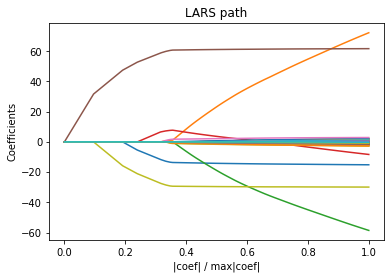

In [27]:
plot_lars(coefs=coefs,lines=False, title = "LARS path")

On comparing the performance of the lasso path and the lars path, we see that the lasso path is more accurate than the lars path, having a lower MSE. However, the lars path converges quicker than the lasso path as seen where it takes 102 iterations to converge whereas the lars path takes only 101 iterations. 

Next, LARS path seems to take variable into consideration even after they hit 0 due to soft thresholding, however in Lasso path, the variables are not considered. Ex: Red path in the both plots. 

In [28]:
# Seeing how many elemnents are common in the active sets
len(set(active_lasso) & set(active_lars))

100

In [29]:
# Doing an order by order comparision of the two paths
[i for i, j in zip(active_lars, active_lasso) if i == j]

[5, 8, 0, 23, 58, 33, 32]

From the above, we can see that although the elements are the same , the order of consideration into the model seems to be different. The above shown estimates are the only one those terms that match in terms of the order of the entry in the model.

5. Fit the lasso path with coordinate descent to the data. Compare the lasso path using coordinate descent with the path using lars. Comment on what you found.

__Solution:__

In [30]:
# Using coordinate descent to get the coefficients
# Importing the required packages
from sklearn.linear_model import lasso_path



In [31]:
# Getting the lasso path for training data using 
# coordinate descent.
# By default, the lasso path is calculated by coordinate descent
alphas,coefs,_ = lasso_path(X_tr_scaled,y_tr)

# Calculating the MSE 
for i in range(coefs.shape[1]):
    print("The MSE for the {}th feature is: {:.4f}".format(i,
                mean_squared_error(y_te,X_te @ coefs[:,i])))

The MSE for the 0th feature is: 6.0565
The MSE for the 1th feature is: 7.5029
The MSE for the 2th feature is: 39.5533
The MSE for the 3th feature is: 96.1462
The MSE for the 4th feature is: 172.1495
The MSE for the 5th feature is: 263.2300
The MSE for the 6th feature is: 365.7405
The MSE for the 7th feature is: 476.6223
The MSE for the 8th feature is: 593.3211
The MSE for the 9th feature is: 713.7136
The MSE for the 10th feature is: 835.2772
The MSE for the 11th feature is: 950.2626
The MSE for the 12th feature is: 1071.7206
The MSE for the 13th feature is: 1197.3625
The MSE for the 14th feature is: 1325.2952
The MSE for the 15th feature is: 1453.9629
The MSE for the 16th feature is: 1582.0973
The MSE for the 17th feature is: 1708.6744
The MSE for the 18th feature is: 1832.8770
The MSE for the 19th feature is: 1954.0634
The MSE for the 20th feature is: 2071.7393
The MSE for the 21th feature is: 2181.9512
The MSE for the 22th feature is: 2288.3765
The MSE for the 23th feature is: 2392.1

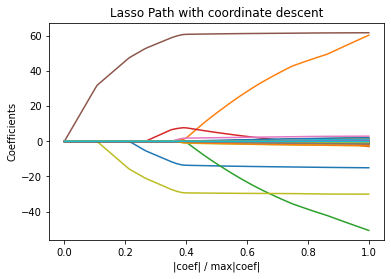

In [32]:
plot_lars(coefs=coefs,lines=False, title = "Lasso Path with coordinate descent")

On comparing the test error for Lasso using the LARS path and Lasso path, we get a lower test error for the Lasso path of 5108.89 as opposed to 5209.31

In [33]:
coefs.shape

(100, 100)

6. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.

In [34]:
# For every model in the lasso path we look at 
# all the non-zero coefficients
overall_mse = []
# X_te_scaled = normalize(X_te,axis = 0)
for coef in coefs.T:
    # Getting all non zero coefficients
    subset_idx = np.where(coef != 0)[0]
    
    # Getting a subset of the data
    X_tr_subset = X_tr_scaled[:,subset_idx]
    X_te_subset = X_te[:,subset_idx]
    if X_tr_subset.shape[1] == 0:
        continue
    # Fitting an OLS model 
    restricted_ols = LinearRegression(fit_intercept = False)
    # Fitting the model
    restricted_ols.fit(X_tr_subset,y_tr)
    
    # Getting the predictions
    predictions = restricted_ols.predict(X_te_subset)
    
    # Getting the mse and storing it 
    overall_mse.append(mean_squared_error(y_te,predictions))

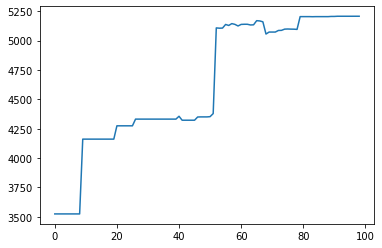

In [35]:
plt.plot(overall_mse)

We can see that introducing more and more variables is leading to a increase in the MSE for the model. This could be because the testing dataset is not normalized

7. Read this website [click here](https://towardsdatascience.com/an-adaptive-lasso-63afca54b80d). Fit the adaptive lasso method to the data. Compare the test error between the adaptive lasso and lasso for each returned coefficient. Comment on what you found.

In [36]:
# Combining the training and testing data 
X = np.concatenate((X_tr,X_te),axis = 0)
X = normalize(X,norm = 'l2',axis = 0)
y = np.concatenate((y_tr,y_te),axis = 0)

In [37]:
# Importing the required libraries 
import asgl

lambda1 = np.linspace(0,1,1000)
adaptive_lasso = asgl.TVT(model = 'lm', penalization='alasso',lambda1 = lambda1,
                          error_type='MSE',weight_technique='lasso', parallel = True,
                          random_state=1,
                          train_pct=0.5 ,validate_pct= .25)

In [38]:
adaptive_lasso.alpha

0.5

In [39]:
# Fitting the model
alasso = adaptive_lasso.train_validate_test(x = X,y = y)

In [40]:
prediction_error = alasso["test_error"]

print("The error for the adaptive lasso model is: {:.4f}".format(prediction_error))

The error for the adaptive lasso model is: 1.1149


In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [45]:
# Splitting the data into training and testing data
# We dont need to scale the data since its already scaled before
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
# Initializing the Lasso with the best alpha in the adaptive lasso case
lasso = Lasso(alpha = 0.5)
# Fitting the model
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [47]:
# Getting the predictions
predictions = lasso.predict(X_test)

In [48]:
# Getting the testing error
mean_squared_error(y_test,predictions)

6.111146714264486

We can see that the error obtained in the adaptive lasso is lower than the lasso. We get an error of 1.07 for the adaptive lasso and 6.11 for the lasso.